In [1]:
# Malta airbnb data

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('vienna_listings.csv')
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())


The data set has 12525 rows and 18 columns


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.252500e+04,1.252500e+04,0.0,12525.000000,12525.000000,12525.000000,12525.000000,12525.000000,10355.000000,12525.000000,12525.000000,12525.000000,0.0
mean,2.173256e+17,1.621128e+08,NaN,48.204880,16.361477,95.643752,6.656687,36.981637,1.428120,16.597764,151.005669,11.129182,NaN
std,3.349190e+17,1.635826e+08,NaN,0.020879,0.034372,181.059639,29.413798,69.525961,1.758495,40.132955,134.700347,19.300898,NaN
min,3.876800e+04,5.783000e+03,NaN,48.125280,16.196650,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.017292e+07,2.147565e+07,NaN,48.190930,16.339120,49.000000,1.000000,1.000000,0.210000,1.000000,0.000000,0.000000,NaN
50%,4.002322e+07,9.597737e+07,NaN,48.204360,16.360370,70.000000,2.000000,9.000000,0.790000,2.000000,133.000000,2.000000,NaN
75%,6.309546e+17,2.857058e+08,NaN,48.218808,16.382294,100.000000,3.000000,40.000000,2.040000,12.000000,286.000000,14.000000,NaN
max,8.464696e+17,5.049978e+08,NaN,48.302928,16.543390,9270.000000,1125.000000,946.000000,40.200000,255.000000,365.000000,407.000000,NaN


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,79,5,357,2022-11-20,2.45,3,42,17,NaN
1,197968,Central 2 bedroom flat,965759,Pierre,NaN,Alsergrund,48.21919,16.35505,Entire home/apt,123,1,78,2022-12-31,0.61,2,338,10,NaN
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,169,1,187,2023-01-02,1.22,15,324,25,NaN
3,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,71,5,360,2023-01-07,2.44,3,89,31,NaN
4,203691,"At the City center room with shower, sink",518644,Michael,NaN,Margareten,48.19347,16.35900,Private room,41,1,63,2023-01-14,0.45,34,310,24,NaN


int64      8
object     5
float64    5
Name: count, dtype: int64

In [4]:
# separate the numerical and categorical columns

df.dtypes == 'object'

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                      True
latitude                          False
longitude                         False
room_type                          True
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                           False
dtype: bool

In [5]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print("The numerical columns are: {}".format(num_vars))
print("The categorical columns are: {}".format(cat_vars))

The numerical columns are: Index(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')
The categorical columns are: Index(['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'], dtype='object')


In [6]:
print(df[num_vars])

print(len(df[num_vars].columns))

                       id    host_id  neighbourhood_group   latitude   
0                   38768     166283                  NaN  48.219240  \
1                  197968     965759                  NaN  48.219190   
2                   40625     175131                  NaN  48.184340   
3                   51287     166283                  NaN  48.217780   
4                  203691     518644                  NaN  48.193470   
...                   ...        ...                  ...        ...   
12520  845438708256110131  504997811                  NaN  48.164064   
12521  845464298903354686  504997811                  NaN  48.164178   
12522  845481082684554487  504997811                  NaN  48.164178   
12523  845498752889866883  504997811                  NaN  48.164178   
12524  845500545006914180  288328438                  NaN  48.223656   

       longitude  price  minimum_nights  number_of_reviews  reviews_per_month   
0      16.378310     79               5               

In [7]:
df[num_vars].isnull() 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12520,False,False,True,False,False,False,False,False,True,False,False,False,True
12521,False,False,True,False,False,False,False,False,True,False,False,False,True
12522,False,False,True,False,False,False,False,False,True,False,False,False,True
12523,False,False,True,False,False,False,False,False,True,False,False,False,True


In [8]:
df[num_vars].isnull().sum()

id                                    0
host_id                               0
neighbourhood_group               12525
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                  2170
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           12525
dtype: int64

In [9]:
missing = df[num_vars].isnull().sum().sort_values(ascending=False)
print(missing)

neighbourhood_group               12525
license                           12525
reviews_per_month                  2170
id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64


In [10]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

neighbourhood_group               1.000000
license                           1.000000
reviews_per_month                 0.173253
id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

In [11]:
oringinal_len = len(missing)
print(oringinal_len)

13


In [12]:
# We can conclude that the columns that have no values should be dropped

# The column with around 17% missing data should be imputed with the mean of its column


In [13]:
# read in the vienna_reviews.csv file
df2 = pd.read_csv('vienna_reviews.csv')
print("The data set has {} rows and {} columns".format(df2.shape[0], df2.shape[1]))
display(df2.describe())
display(df2.head())
display(df2.dtypes.value_counts())

The data set has 463195 rows and 2 columns


,listing_id
count,4.631950e+05
mean,4.798029e+16
std,1.736548e+17
min,3.876800e+04
25%,9.359771e+06
50%,2.184257e+07
75%,3.866581e+07
max,8.428603e+17


,listing_id,date
0,38768,2011-03-23
1,235772,2012-05-24
2,235772,2012-06-24
3,235772,2012-12-08
4,235772,2013-07-15


int64     1
object    1
Name: count, dtype: int64

In [27]:
# create a new column from the date column in reviews data set
df3 = df.join(df2, on='id', how='inner', lsuffix='_left', rsuffix='_right')

print(df3.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'listing_id',
       'date'],
      dtype='object')


In [14]:
# python pandas how to join a dataframe only if value matches another column value

# https://stackoverflow.com/questions/40468069/python-pandas-how-to-join-a-dataframe-only-if-value-matches-another-column-valu

In [16]:
# plot a line graph of the price and the date 




In [17]:
# delete rows with na in the host_name column
df = df.dropna(subset=['host_name'], how='any', axis=0)

# update the num_vars variable with current numerical columns
num_vars = df.columns[df.dtypes != 'object']

In [18]:
# delete rows with na in the name column
df = df.dropna(subset=['name'], how='any', axis=0)

# update the num_vars variable with current numerical columns
num_vars = df.columns[df.dtypes != 'object']

In [19]:
# imputing numerical values with mean
fill_mean = lambda col: col.fillna(col.mean())

# apply the function to the data frame with nmbnerical columns
df[num_vars] = df[num_vars].apply(fill_mean)

In [20]:
# imputation for categorical variables

# fill missing values in the cat_vars with the 'Missing Data
df[cat_vars] = df[cat_vars].fillna('Missing Data')

In [21]:
# show the number of missing values in each column by percentage
df.isnull().sum().sort_values(ascending=False)/len(df)

license                           1.0
neighbourhood_group               1.0
minimum_nights                    0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
id                                0.0
name                              0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
price                             0.0
dtype: float64

In [22]:
# Now that we have removed all the missing values, we can now move on to the next step
# and visualise the data
print(num_vars)
print(cat_vars)
print(df.columns)

Index(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')
Index(['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'], dtype='object')
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


<Axes: xlabel='date', ylabel='price'>

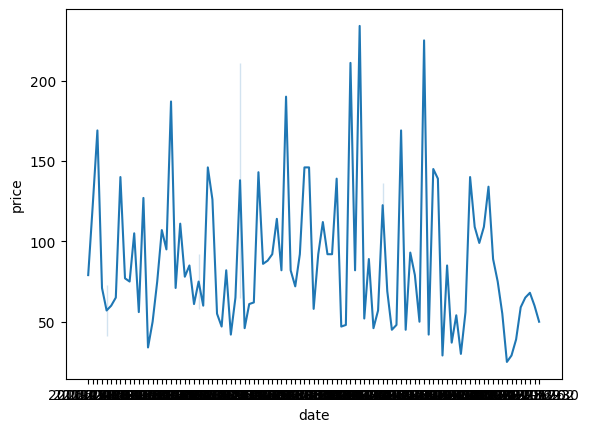

In [30]:

# plot a line graph of the price and the date
sns.lineplot(x='date', y='price', data=df3)

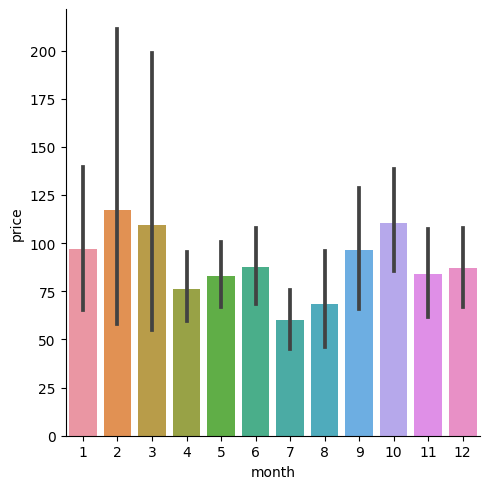

In [52]:
# convert the date column to datetime
df3['date'] = pd.to_datetime(df3['date'])

# create a month column from the date column
df3['month'] = df3['date'].dt.month


# what month has the most recorded airbnb visitors?
month_labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',  'November', 'December']
sns.catplot(x='month',y='price', kind='bar', data=df3)


# what are the most expensive times of the year to visit vienna?
# by how much do prices spike?
# is there a general upward trend of both new airbnb listings and total airbnb visitors to vienna?




In [23]:
# what is the average minimum nights stay in Vienna
print(df['minimum_nights'].mean())


6.661737670849653


In [26]:
# make a line plot of price over date using seaborn
sns.lineplot(x='price', y='date', data=df)

ValueError: Could not interpret value `date` for parameter `y`

In [25]:
# What are the busiest times of the year to visit?

# By how much do prices spike?

# Is there a general upward trend of both new Airbnb listings and total Airbnb visitors?

# Did you detect any outliers